### FindMarkers on Tumor

Main Figure 3 and corresponding supplemental figures are generated

Author: Pierre Isnard, Dian Li, Haojia Wu

Contact: dianli@wustl.edu

Last updated: December 6, 2023

In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(reshape2)
library(EnhancedVolcano)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 


Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked 

In [2]:
plots_path_main = "../../plots/version_1/main_figures"
plots_path_supp = "../../plots/version_1/supp_figures"
processed_data_path = "../../processed_data/version_1/FindMarkers"

dir.create(plots_path_main, showWarnings = F, recursive = T)
dir.create(plots_path_supp, showWarnings = F, recursive = T)
dir.create(processed_data_path, showWarnings = F, recursive = T)

### Step 1. Load dkd1 Seurat object generated from Figure 1

In [3]:
load("../../processed_data/version_1/dkd1_umap.RData")

In [4]:
load("../../meta/meta_info.RData")

### Step 2. FindMarker for Tumor cluster

In [5]:
Idents(dkd1) <- dkd1$Morph.based

In [6]:
Tumor.markers <- FindMarkers(dkd1, ident.1 = c("Tumor"), ident.2 = NULL, min.pct = 0.1, return.thresh = 0.05)

In [7]:
dim(Tumor.markers)
head(Tumor.markers)

[1] 4509    5

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SCEL,0.000000e+00,1.469256,0.892,0.038,0.000000e+00
WFDC5,2.982004e-282,1.036220,0.715,0.021,5.381324e-278
SLC5A1,1.377998e-275,1.889951,0.924,0.060,2.486736e-271
FOXP2,3.991364e-270,1.778005,0.956,0.068,7.202816e-266
WFDC12,7.471963e-266,1.400721,0.835,0.043,1.348390e-261
VSTM2L,3.755624e-262,1.936378,0.981,0.082,6.777399e-258


In [8]:
write.csv(Tumor.markers, file = file.path(processed_data_path, "TumorMarkers.csv"))

### Step 3. Generate Volcano Plot

In [9]:
custom_theme <- theme(text = element_text(family = "Helvetica"))

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


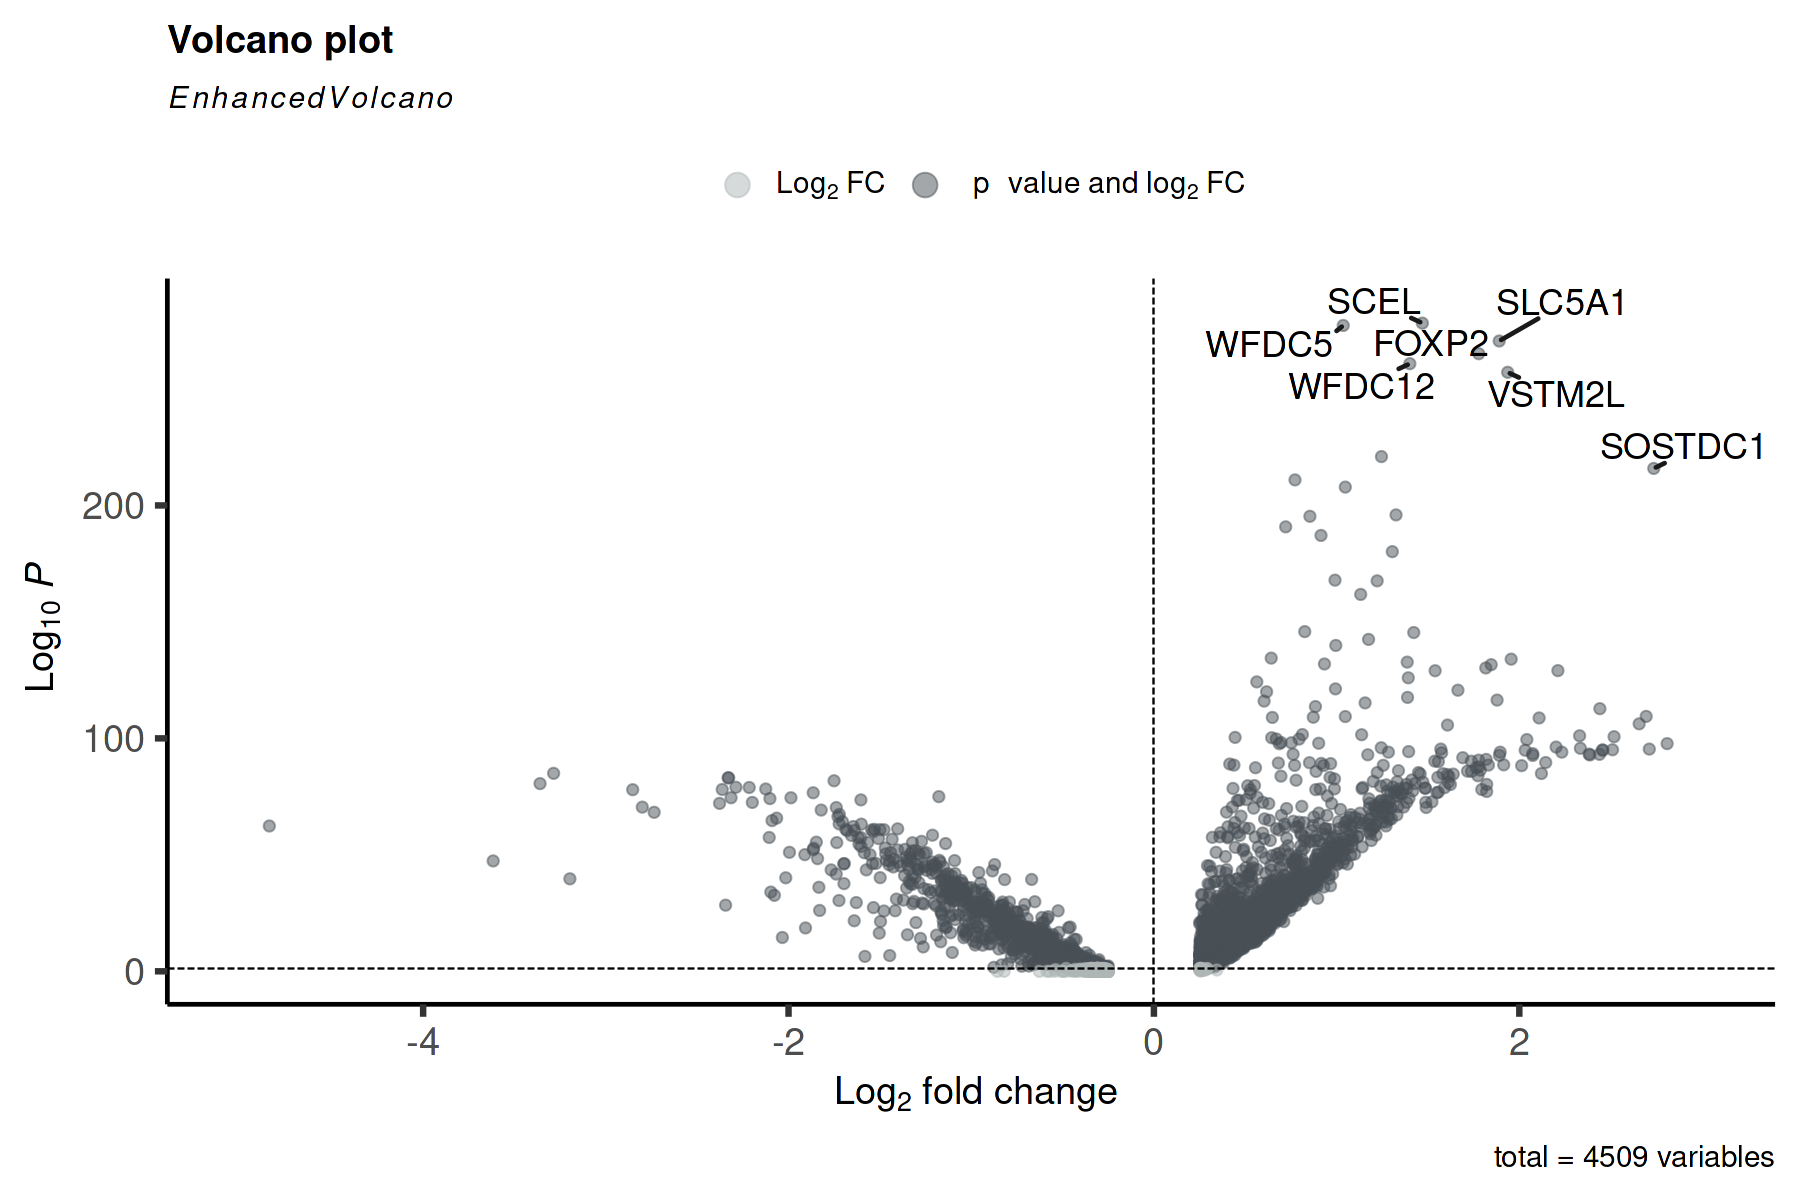

In [13]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 150)

my_select = c('WFDC5', 'SCEL', 'FOXP2', 'SLC5A1', 'WFDC12', 'VSTM2L', 'SOSTDC1')

p = EnhancedVolcano(Tumor.markers,
                    rownames(Tumor.markers),
                    selectLab = my_select,
                    drawConnectors = TRUE,
                    arrowheads = FALSE,
                    widthConnectors = 0.8,
                    x ="avg_log2FC",
                    y ="p_val_adj",
                    xlim = c(-5, 3),
                    pCutoff = 0.05,
                    FCcutoff = 0,      #  to not show the X axes,
                    gridlines.major = FALSE,
                    gridlines.minor = FALSE,
                    col=c('#ADB6B6', '#ADB6B6', '#ADB6B6', as.character(color_palette["Tumor"])),
                    labSize = 6
)
p = p + custom_theme
p

ggsave(file.path(plots_path_main, "VolcanoPlot_FindMarkers_Tumor.png"), plot = p, width = 8, height = 8, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "VolcanoPlot_FindMarkers_Tumor.pdf"), plot = p, width = 8, height = 8, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "VolcanoPlot_FindMarkers_Tumor.svg"), plot = p, width = 8, height = 8, units = "in", dpi = 300)

### Step 4. Subset Tumor cluster to generate new UMAP and clusters

In [14]:
dkd1_tumor = subset(dkd1, idents = "Tumor")
dkd1_tumor

An object of class Seurat 
36131 features across 158 samples within 2 assays 
Active assay: SCT (18046 features, 3000 variable features)
 1 other assay present: Spatial
 2 dimensional reductions calculated: pca, umap
 1 image present: slice1

In [15]:
dkd1_tumor <- SCTransform(dkd1_tumor, assay = "Spatial", verbose = FALSE)
dkd1_tumor <- RunPCA(dkd1_tumor, assay = "SCT", verbose = FALSE)
dkd1_tumor <- FindNeighbors(dkd1_tumor, reduction = "pca", dims = 1:20)
dkd1_tumor <- FindClusters(dkd1_tumor, verbose = FALSE, resolution = 1)
dkd1_tumor <- RunUMAP(dkd1_tumor, reduction = "pca", dims = 1:20, min.dist = 0.1)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:20:55 UMAP embedding parameters a = 1.577 b = 0.8951

17:20:55 Read 158 rows and found 20 numeric columns

17:20:55 Using Annoy for neighbor search, n_neighbors = 30

17:20:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:20:55 Writing NN index file to temp file /tmp/RtmpFSXTiX/file393906587bad6

17:20:55 Searching Annoy index using 1 thread, search_k = 3000

17:20:55 Annoy recall = 100%

17:20:55 Commencing smooth kNN distance cali

In [16]:
custom_theme <- theme(text = element_text(family = "Helvetica"))

empty_theme = theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank())

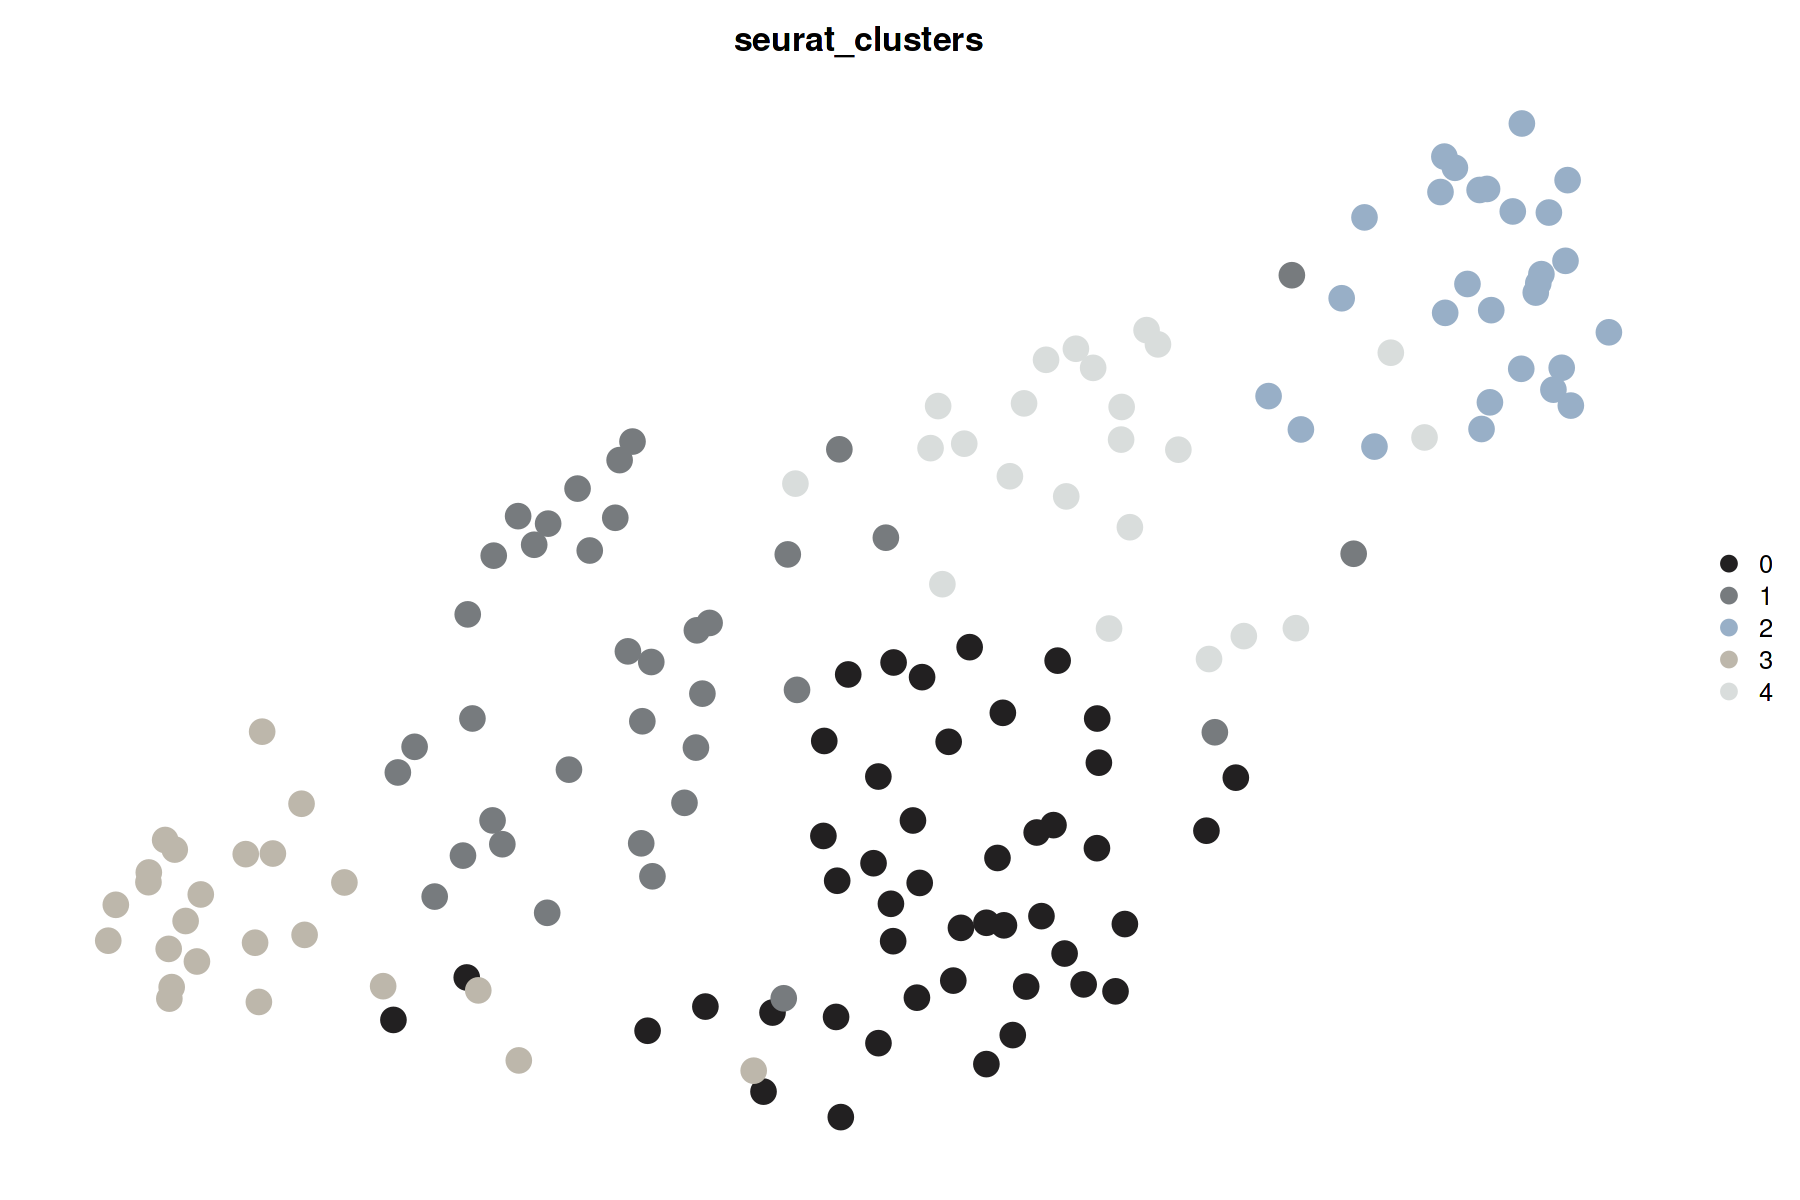

In [17]:
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 150)
p = DimPlot(dkd1_tumor, group.by = "seurat_clusters", raster = FALSE, pt.size = 5, 
            cols = c("#222021", 
    "#777B7E",
    "#98AFC7",
    "#BDB7AB",
    "#D9DDDC"))
p = p + empty_theme + custom_theme
p

ggsave(file.path(plots_path_main, "Dimplot_Tumor.png"), plot = p, width = 12, height = 8, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "Dimplot_Tumor.pdf"), plot = p, width = 12, height = 8, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "Dimplot_Tumor.svg"), plot = p, width = 12, height = 8, units = "in", dpi = 300)

#### Step 4.2. Export subcluster meta for CellScope Visualization

In [18]:
df_meta_Tumor = data.frame("tumor_cluster" = dkd1_tumor$seurat_clusters)
df_meta_Tumor$tumor_cluster = paste0("Tumor_", df_meta_Tumor$tumor_cluster)
df_meta_Tumor$barcode = rownames(df_meta_Tumor)

df_meta = data.frame("barcode" = dkd1$Barcode)
df_meta$tumor_cluster = "none"

df_meta[df_meta_Tumor$barcode, "tumor_cluster"] = df_meta_Tumor$tumor_cluster

write.csv(df_meta, "../../meta/subclusters_Tumor.csv", row.names = F)

### Step 5. Over representation analysis with GO BP

In [19]:
# find clusters markers Only Positive ones
Tumor.Pos.markers <- FindAllMarkers(dkd1_tumor, only.pos = TRUE, min.pct = 0.1, return.thresh = 0.05)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



In [20]:
# Load the function
library("gplots")
library("clusterProfiler")
library("ComplexHeatmap")
library(org.Hs.eg.db)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations 

In [21]:
# Change genes name to entrezID
Cluster_df = Tumor.Pos.markers
cluster_name_list = unique(Cluster_df$cluster)
cluster_name_list

ids_list = lapply(cluster_name_list, FUN = function(x){
  cluster_i <- Cluster_df[Cluster_df$cluster == x, ]
  ids <- bitr(cluster_i$gene, fromType = 'SYMBOL', toType = c('SYMBOL', 'ENTREZID'), OrgDb = 'org.Hs.eg.db')
  ids$ENTREZID
})
names(ids_list) = seq(0, length(cluster_name_list)-1)

# Enrichment analysis with enrichGO Biological Process (BP)
ck <- compareCluster(geneCluster = ids_list, fun = enrichGO,
                     OrgDb = org.Hs.eg.db,
                     # keytype = 'ENTREZID',
                     ont = 'BP',
                     pAdjustMethod = 'BH',
                     pvalueCutoff = 0.05,
                     qvalueCutoff = 0.1)
ck <- setReadable(ck, OrgDb = org.Hs.eg.db, keyType="ENTREZID")


[1] 0 1 2 3 4
Levels: 0 1 2 3 4

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“0.87% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“1.51% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“1.71% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“1.77% of input gene IDs are fail to map...”
'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(cluster_i$gene, fromType = "SYMBOL", toType = c("SYMBOL", :
“4.69% of input gene IDs are fail to map...”


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


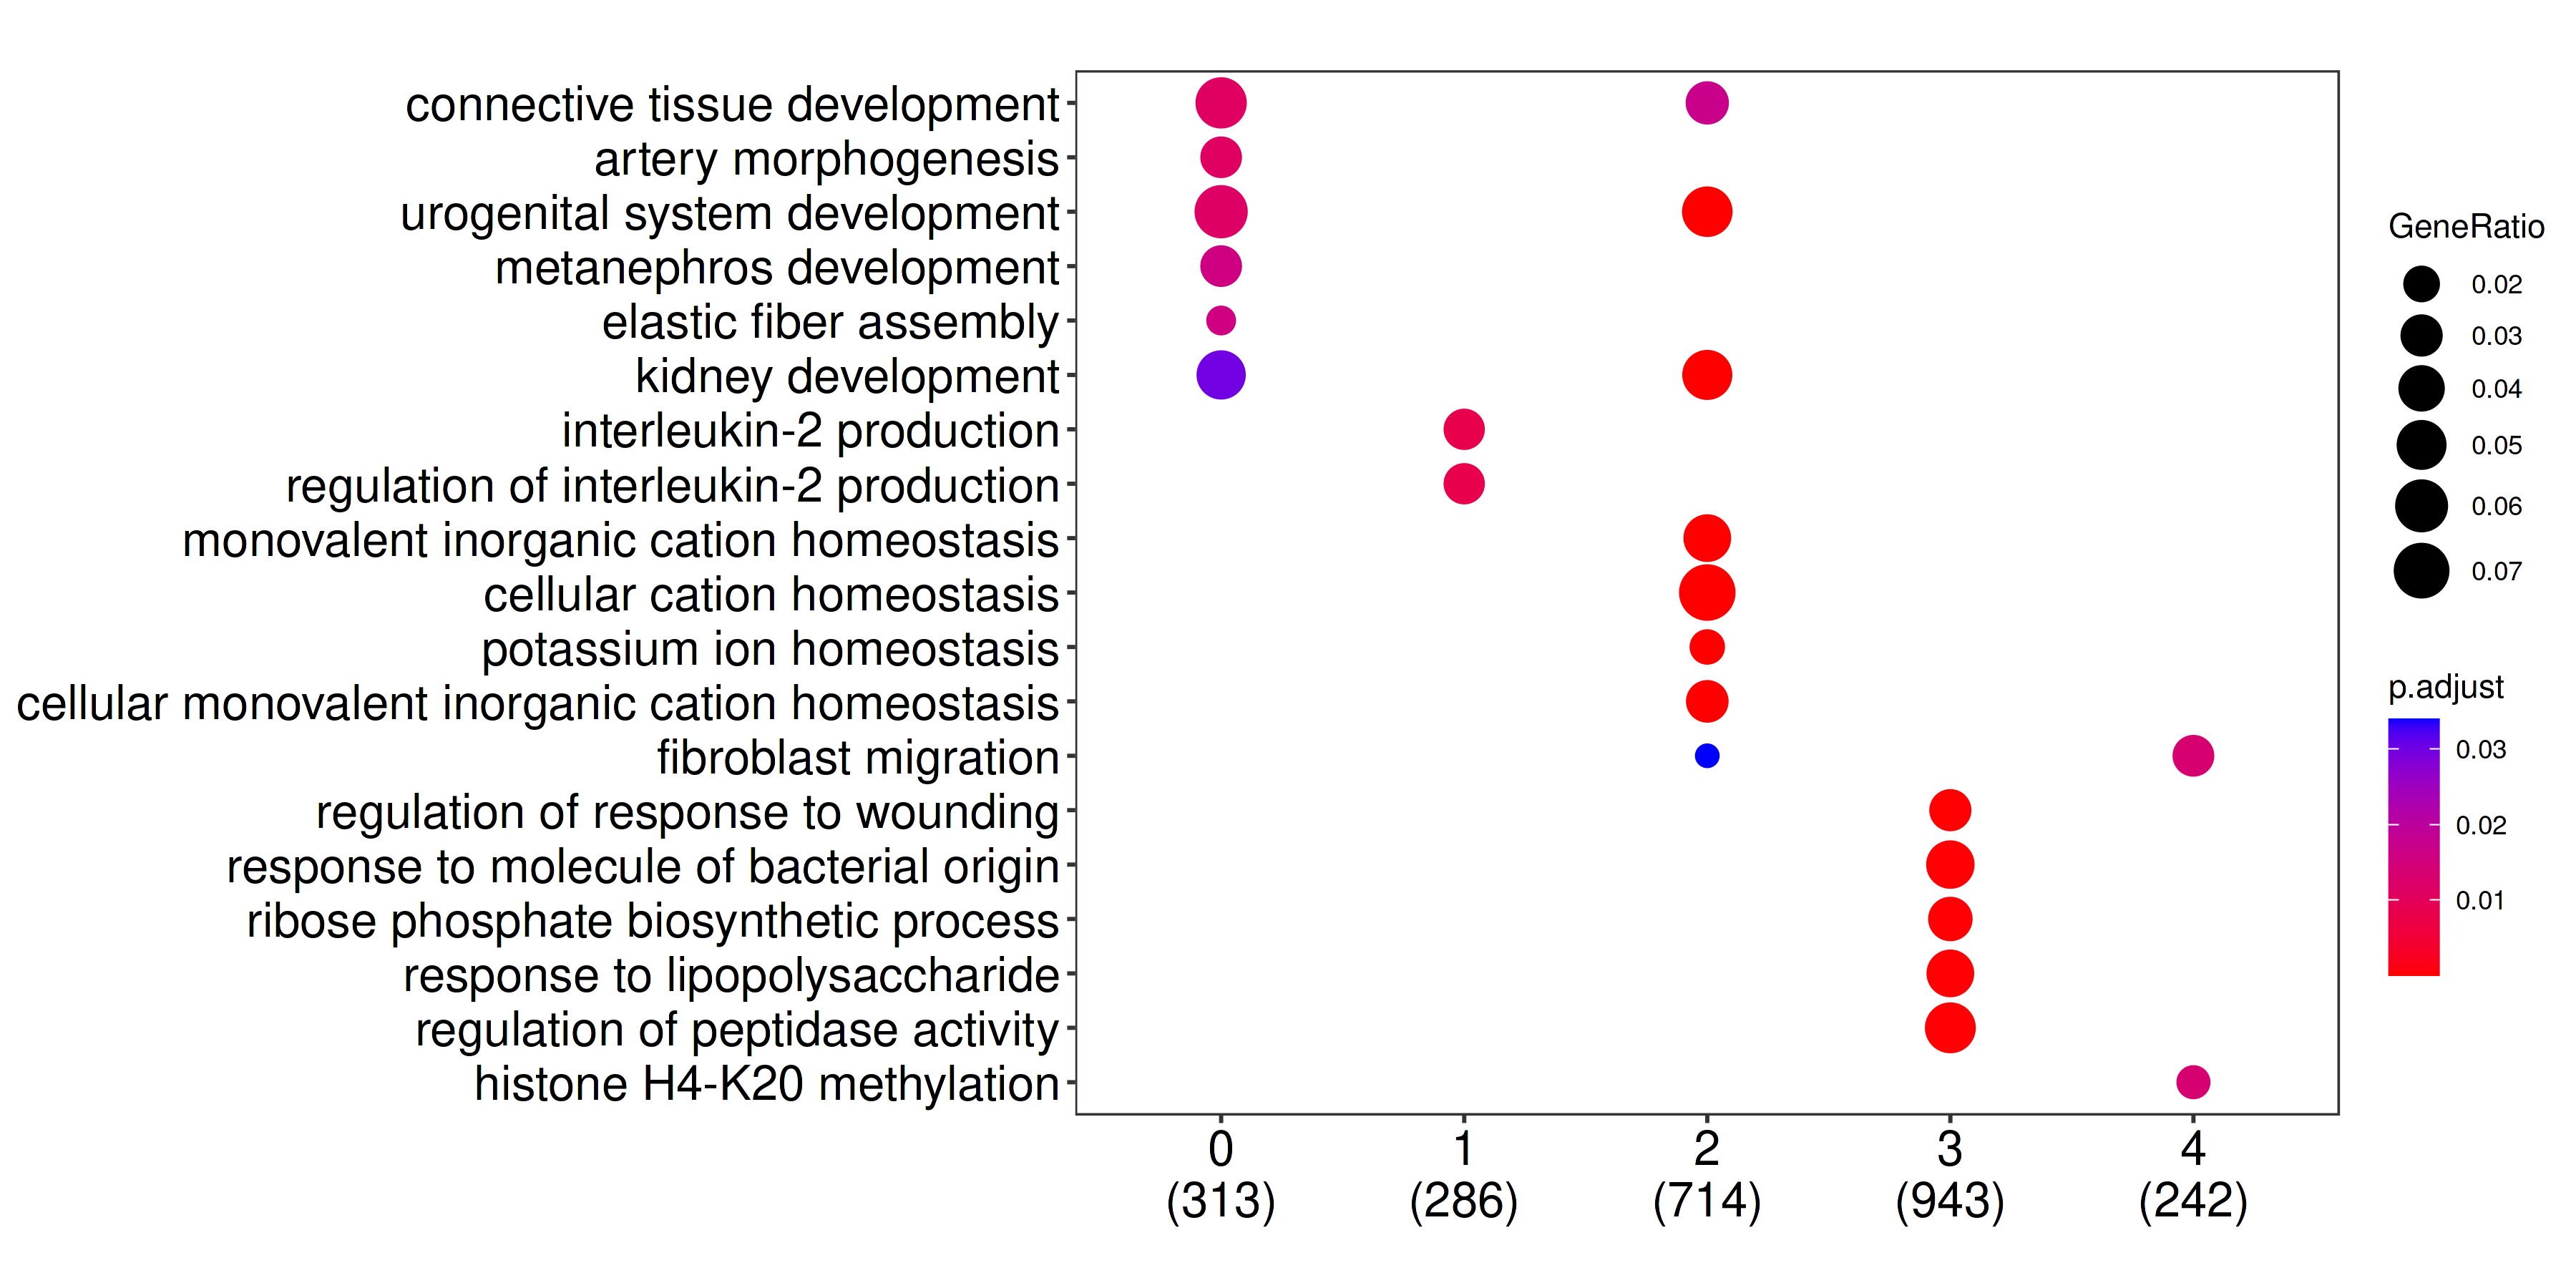

In [27]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 300)
# Plot and visualise the data
p = dotplot(ck)
# adjust the size of y axis labels
library(scales)
p = p + scale_y_discrete(labels = wrap_format(100))
p = p + custom_theme +
  xlab("") + 
theme(axis.title.x = element_text(face="bold"), 
      panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
      axis.text.x=element_text(size=16),
      axis.text.y=element_text(size=16)
)
p

ggsave(file.path(plots_path_main, "ORA_DotPlot_Tumor.png"), plot = p, width = 12, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "ORA_DotPlot_Tumor.pdf"), plot = p, width = 12, height = 6, units = "in", dpi = 300)
ggsave(file.path(plots_path_main, "ORA_DotPlot_Tumor.svg"), plot = p, width = 12, height = 6, units = "in", dpi = 300)

### Step 4. Generate feature plot on UMAP

In [20]:
custom_theme <- theme(text = element_text(family = "Helvetica"))

empty_theme = theme(axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      axis.title.x=element_blank(),
      axis.title.y=element_blank())

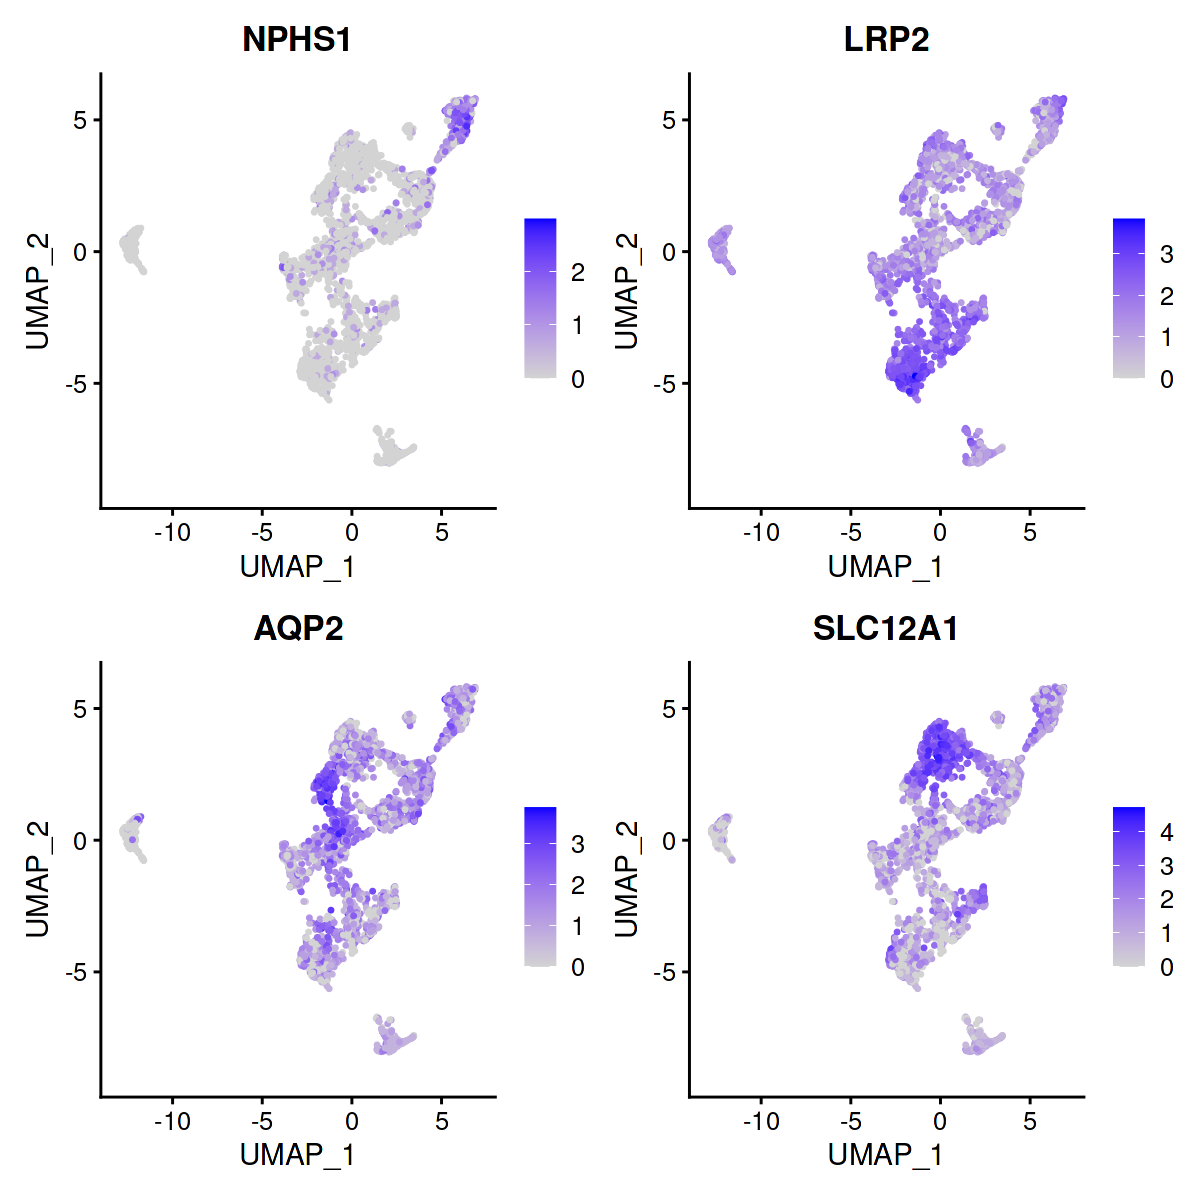

In [21]:
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 150)
feature_list = c("NPHS1", "LRP2","AQP2", "SLC12A1")
p = FeaturePlot(dkd1, feature = feature_list)

p

In [22]:
for (feature_single in feature_list){
    p <- FeaturePlot(dkd1, feature = feature_single) + 
#    guides(fill = guide_legend(override.aes = list(size=6), title="nCount_Spatial") ) +
    custom_theme + 
    empty_theme
    
    ggsave(p, filename = file.path(plots_path_supp, paste0("FeaturePlot_",feature_single,".png")), width = 6, height = 5, units = "in", dpi = 300)
    ggsave(p, filename = file.path(plots_path_supp, paste0("FeaturePlot_",feature_single,".pdf")), width = 6, height = 5, units = "in", dpi = 300)
    ggsave(p, filename = file.path(plots_path_supp, paste0("FeaturePlot_",feature_single,".svg")), width = 6, height = 5, units = "in", dpi = 300)
 
}

In [23]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scales_1.2.1           org.Hs.eg.db_3.16.0    AnnotationDbi_1.60.2  
 [4] IRanges_2.32.0         S4Vectors_0.36.2       Biobase_2.52.0        
 [7] BiocGenerics_0.44.0    ComplexHeatmap_2.14.0  clusterProfiler_4.6.2 
[10] gplots_3.1.1     